In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def make_islands(n, low=10, high=101):
    islands = np.random.randint(low, high, n+2)
    islands[0] = 0
    islands[-1] = 0
    return islands

In [2]:
def hop(islands, start=1, niter=1000):
    pos = start# 현재 섬 위치
    pop = islands[pos]# 현재 섬 인구수
    thetas = np.zeros(niter+1, dtype='int')
    thetas[0] = pos
    for i in range(niter):
        k=np.random.choice([-1,1],1) #proposal distribution creating (동전던져서 왼쪽 오른쪽 정하기) 알고리즘: -1,1중 하나 sample함.
        next_pos=? #새로운 포지션
        next_pop=islands[?] #새로운 섬의 인구P(Theta proposed)
        p=min(1,?) #moving probabilistically(움직일 확률 구하기)
        if np.random.random()<p:
            pos=next_pos #조건을 만족하면 다음 섬으로 가라!)
            pop=next_pop#다음 섬의 인구수
        thetas[i+1]=pos # 다음 섬의 위치를 리스트에 저장
    return thetas

In [15]:
islands=make_islands(10)
thetas=hop(islands)
islands


array([ 0, 88, 70, 11, 38, 77, 22, 68, 93, 89, 28,  0])

<BarContainer object of 10 artists>

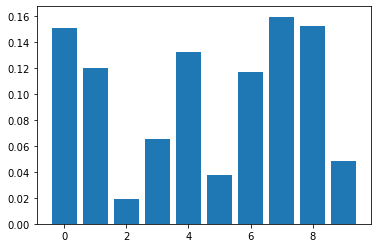

In [16]:
data=islands[1:-1]
data=data/data.sum()
plt.bar(np.arange(len(data)),data)


<BarContainer object of 10 artists>

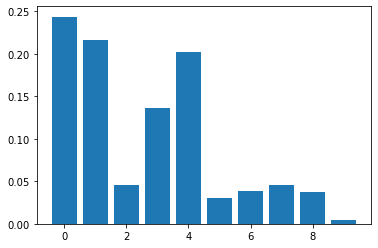

In [17]:
data = np.bincount(thetas)[1:]
data = data/data.sum()
x=np.arange(len(data))
plt.bar(x,data)

In [45]:
def target(lik, prior, n, h, theta): #P(theta)를 likelihood와 prior의 곱으로 반환하는 함수
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(n, theta).pmf(h)*prior.pdf(theta) 
'''
prior settings
'''
n = 20
h = 14
a = 1
b = 1
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.2

naccept = 0
theta = 0.01
niters = 1000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs() #theta_proposed=theta_current+theta_data
    rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))#moving probability
    u = np.random.uniform()
    '''
    움직이는 걸 결정하는 process
    '''
    if u < rho:              

        naccept = naccept+1
        theta = theta_p 
    samples[i+1] = theta

print("Accept rate= ", naccept/niters)

Accept rate=  0.507


Text(0.4, 990, 'Accept rate=middle')

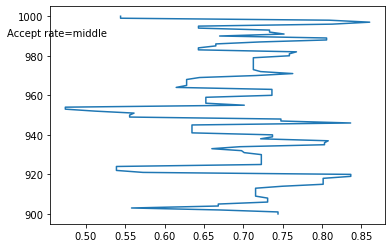

In [46]:
plt.plot(samples[900:niters+1],np.arange(900,niters+1))
plt.text(0.4,990,"Accept rate=middle")

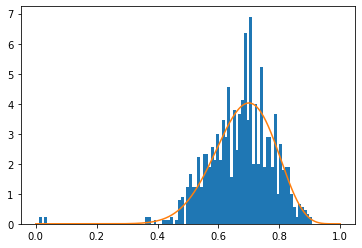

In [20]:
x=np.linspace(0,1,1000)
plt.hist(samples,density=True,bins=100)
plt.plot(x,stats.beta(15,7).pdf(x))
plt.show()

In [43]:
n = 20
h = 14
a = 1
b = 1
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.02

naccept = 0
theta = 0.01
niters = 1000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept = naccept+1
        theta = theta_p
    samples[i+1] = theta

print("Accept rate = ", naccept/niters)

Accept rate =  0.9


Text(0.6, 990, 'Accept rate=High')

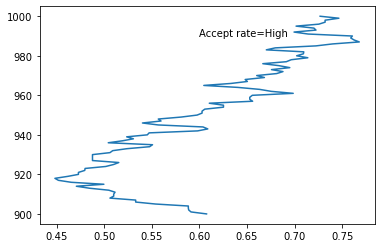

In [44]:
plt.plot(samples[900:niters+1],np.arange(900,niters+1))
plt.text(0.60,990, "Accept rate=High")

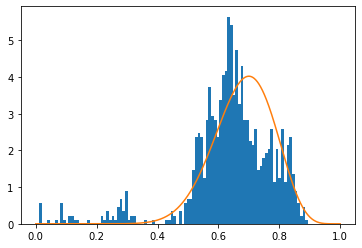

In [29]:
x=np.linspace(0,1,1000)
plt.hist(samples,density=True,bins=100)
plt.plot(x,stats.beta(15,7).pdf(x))
plt.show()

In [47]:
n = 20
h = 14
a = 1
b = 1
lik = stats.binom
prior = stats.beta(a, b)
sigma = 2

naccept = 0
theta = 0.01
niters = 1000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept = naccept+1
        theta = theta_p
    samples[i+1] = theta

print("Accept rate = ", naccept/niters)

Accept rate =  0.051


Text(0.57, 990, 'Accept rate=low')

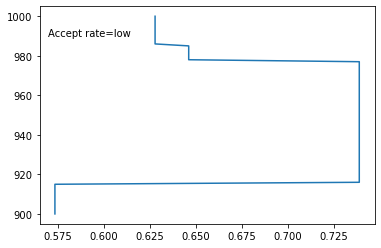

In [48]:
plt.plot(samples[900:niters+1],np.arange(900,niters+1))
plt.text(0.57,990, "Accept rate=low")

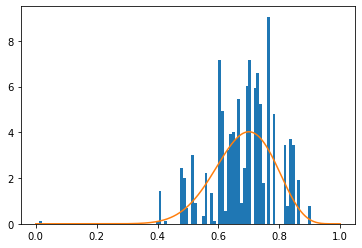

In [32]:
x=np.linspace(0,1,1000)
plt.hist(samples,density=True,bins=100)
plt.plot(x,stats.beta(15,7).pdf(x))
plt.show()